Day 3 — Compare Portfolio vs Benchmark

Today’s goal:
1. Load benchmark and portfolio price data
2. Compute cumulative returns over the entire data period
3. Compute annualized returns for each calendar year in the data period
4. Compute annualized return for the trailing 15-year data period
5. Calculate basic risk/return metrics
6. Visualize the results from 2 above
7. Visualize the results from 3 above
8. Visualize the results from 4 above

In [ ]:
# Imports
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load Benchmark & Portfolio Data
data_dir = Path("..") / "data"

benchmark_prices = pd.read_parquet(data_dir / "benchmark_prices.parquet")
portfolio_prices = pd.read_parquet(data_dir / "portfolio_prices.parquet")

benchmark_weights = json.load(open(data_dir / "benchmark_weights.json"))
portfolio_weights  = json.load(open(data_dir / "portfolio_weights.json"))

In [ ]:
# Compute Daily Returns
benchmark_returns = benchmark_prices.pct_change().dropna()
portfolio_returns = portfolio_prices.pct_change().dropna()

In [ ]:
# Align Dates
common_index = benchmark_returns.index.intersection(portfolio_returns.index)
benchmark_returns = benchmark_returns.loc[common_index]
portfolio_returns = portfolio_returns.loc[common_index]

In [ ]:
# Weighted Daily Returns
bw = pd.Series(benchmark_weights)
pw = pd.Series(portfolio_weights)

benchmark_total_return = (benchmark_returns * bw).sum(axis=1)
portfolio_total_return = (portfolio_returns * pw).sum(axis=1)

In [ ]:
# Compute Cumulative Returns
benchmark_cum = (1 + benchmark_total_return).cumprod()
portfolio_cum = (1 + portfolio_total_return).cumprod()

In [ ]:
# Compute Calendar-Year Annualized Returns
def annualize(series):
    """Annualize using geometric compounding."""
    return (1 + series).prod() - 1

benchmark_yearly = benchmark_total_return.groupby(benchmark_total_return.index.year).apply(annualize)
portfolio_yearly = portfolio_total_return.groupby(portfolio_total_return.index.year).apply(annualize)

annual_table = pd.DataFrame({
    "Benchmark": benchmark_yearly,
    "Portfolio": portfolio_yearly
})
annual_table

,Benchmark,Portfolio
Date,,
2010,0.030164,0.051463
2011,-0.052369,0.018551
2012,0.131671,0.178750
2013,0.173904,0.300996
2014,0.029343,0.103166
2015,-0.012295,0.023440
2016,0.067032,0.121554
2017,0.184292,0.237121
2018,-0.071475,-0.031991


In [ ]:
# Compute Trailing Annualized Return Over Entire Period
days = len(benchmark_total_return)
ann_factor = 252

benchmark_ann_15yr = (1 + benchmark_total_return).prod() ** (ann_factor / days) - 1
portfolio_ann_15yr = (1 + portfolio_total_return).prod() ** (ann_factor / days) - 1

In [ ]:
# Annualized Volatility
benchmark_vol = benchmark_total_return.std() * (ann_factor ** 0.5)
portfolio_vol = portfolio_total_return.std() * (ann_factor ** 0.5)

In [ ]:
# Sharpe Ratio (assuming RF = 0)                Note: RF, the risk-free rate, is assumed to be 0 for simplicity
benchmark_sharpe = benchmark_ann_15yr / benchmark_vol
portfolio_sharpe = portfolio_ann_15yr / portfolio_vol

In [ ]:
# Summary table
risk_table = pd.DataFrame({
    "Benchmark": [benchmark_ann_15yr, benchmark_vol, benchmark_sharpe],
    "Portfolio": [portfolio_ann_15yr, portfolio_vol, portfolio_sharpe]
}, index=["Annualized Return", "Annualized Volatility", "Sharpe Ratio"])
risk_table

,Benchmark,Portfolio
Annualized Return,0.082562,0.133653
Annualized Volatility,0.133915,0.151269
Sharpe Ratio,0.616522,0.883544


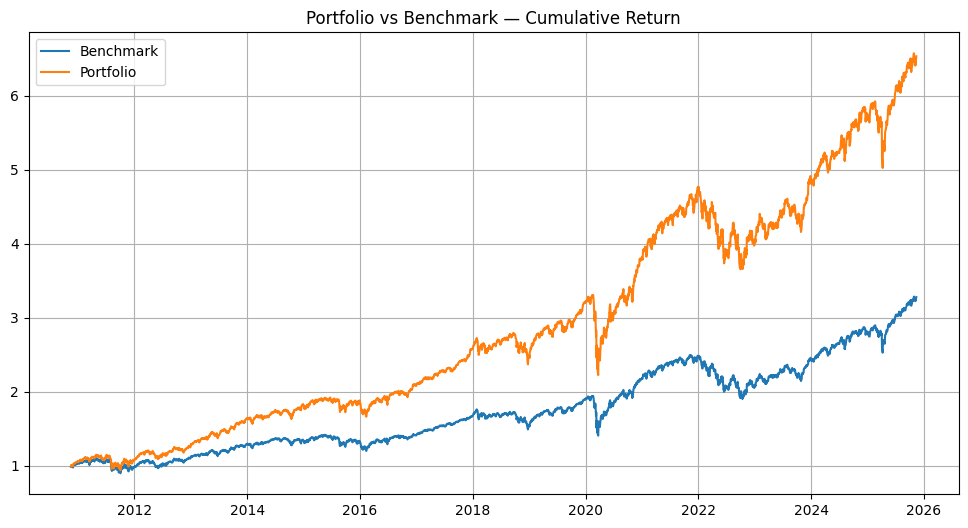

In [ ]:
# Plot: Cumulative Return Comparison
plt.figure(figsize=(12,6))
plt.plot(benchmark_cum, label="Benchmark")
plt.plot(portfolio_cum, label="Portfolio")
plt.title("Portfolio vs Benchmark — Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

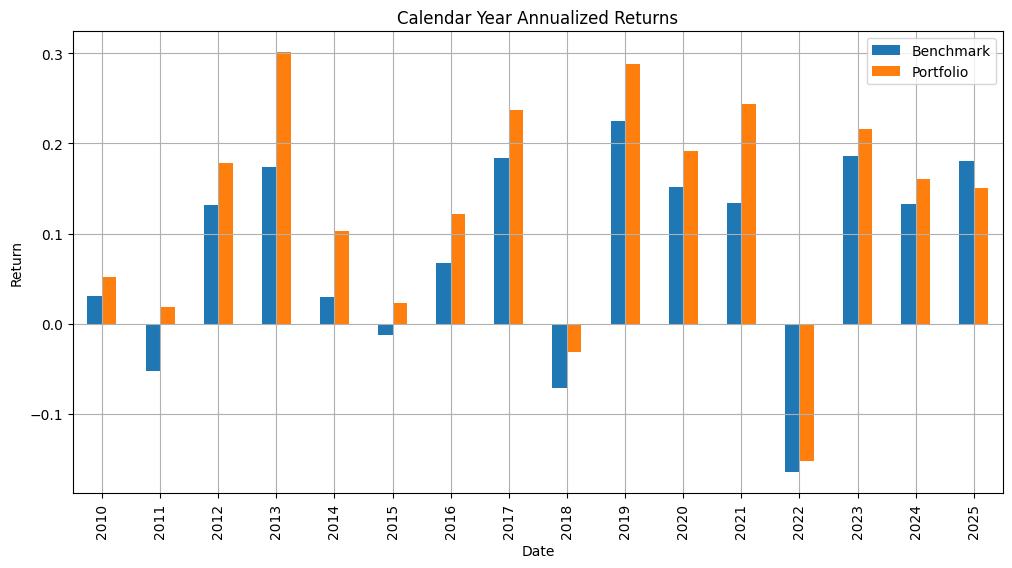

In [ ]:
# Plot: Calendar-Year Annualized Returns
annual_table.plot(kind="bar", figsize=(12,6))
plt.title("Calendar Year Annualized Returns")
plt.ylabel("Return")
plt.grid(True)
plt.show()

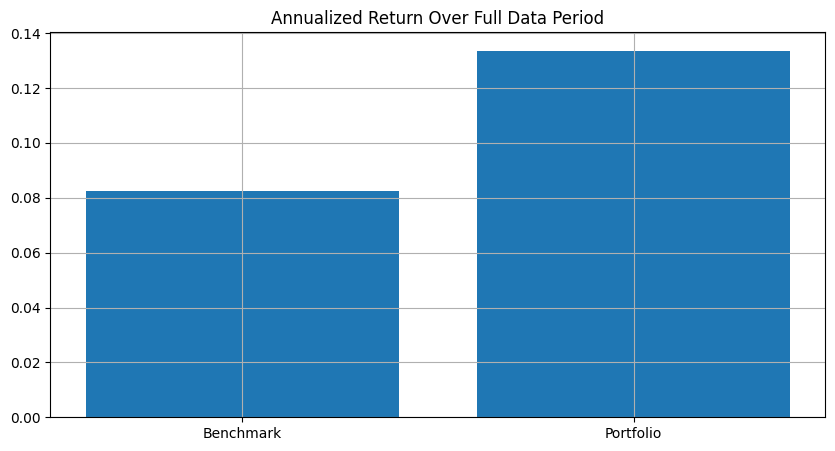

In [38]:
# Plot: Full-Period Annualized Return Comparison
plt.figure(figsize=(10,5))
plt.bar(["Benchmark", "Portfolio"], [benchmark_ann_15yr, portfolio_ann_15yr])
plt.title("Annualized Return Over Full Data Period")
plt.grid(True)
plt.show()